In [1]:
# header files 
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sn
from sklearn import svm

# reading training datasets from folders of each of the class
train_dataset1 = np.genfromtxt(r"dataset\Dataset_2A\forest\train.csv",delimiter=',')
feature_train1 = train_dataset1[1:,1:25]
class_train1 = [0]*len(feature_train1)
train_dataset2 = np.genfromtxt(r"dataset\Dataset_2A\highway\train.csv",delimiter=',')
feature_train2 = train_dataset2[1:,1:25]
class_train2 = [1]*len(feature_train2)
train_dataset3 = np.genfromtxt(r"dataset\Dataset_2A\insidecity\train.csv",delimiter=',')
feature_train3 = train_dataset3[1:,1:25]
class_train3 = [2]*len(feature_train3)
train_dataset4 = np.genfromtxt(r"dataset\Dataset_2A\mountain\train.csv",delimiter=',')
feature_train4 = train_dataset4[1:,1:25]
class_train4 = [3]*len(feature_train4)
train_dataset5 = np.genfromtxt(r"dataset\Dataset_2A\street\train.csv",delimiter=',')
feature_train5 = train_dataset5[1:,1:25]
class_train5 = [4]*len(feature_train5)

# concatenating the datasets to form a single dataset
feature_train = np.concatenate([feature_train1,feature_train2,feature_train3,feature_train4,feature_train5])
class_train = np.concatenate([class_train1,class_train2,class_train3,class_train4,class_train5])

# reading devloper datasets from folders of each of the class
dev_dataset1 = np.genfromtxt(r"dataset\Dataset_2A\forest\dev.csv",delimiter=',')
feature_dev1 = dev_dataset1[1:,1:25]
class_dev1 = [0]*len(feature_dev1)
dev_dataset2 = np.genfromtxt(r"dataset\Dataset_2A\highway\dev.csv",delimiter=',')
feature_dev2 = dev_dataset2[1:,1:25]
class_dev2 = [1]*len(feature_dev2)
dev_dataset3 = np.genfromtxt(r"dataset\Dataset_2A\insidecity\dev.csv",delimiter=',')
feature_dev3 = dev_dataset3[1:,1:25]
class_dev3 = [2]*len(feature_dev3)
dev_dataset4 = np.genfromtxt(r"dataset\Dataset_2A\mountain\dev.csv",delimiter=',')
feature_dev4 = dev_dataset4[1:,1:25]
class_dev4 = [3]*len(feature_dev4)
dev_dataset5 = np.genfromtxt(r"dataset\Dataset_2A\street\dev.csv",delimiter=',')
feature_dev5 = dev_dataset5[1:,1:25]
class_dev5 = [4]*len(feature_dev5)

# concatenating the datasets to form a single dataset
dev_dataset = np.concatenate([feature_dev1,feature_dev2,feature_dev3,feature_dev4,feature_dev5])
dev_class = np.concatenate([class_dev1,class_dev2,class_dev3,class_dev4,class_dev5])

class_count = 5
d = len(feature_train[0])

# splitting the developer data into validation data and test data
feature_test = np.zeros((int(len(dev_dataset)/2),d))
class_test = np.zeros(int(len(dev_dataset)/2))
feature_dev = np.zeros((int((len(dev_dataset)+1)/2),d))
class_dev = np.zeros(int((len(dev_dataset)+1)/2))
for i in range(len(dev_dataset)):
    if i%2:
        feature_test[int((i-1)/2)] = dev_dataset[i]
        class_test[int((i-1)/2)] = dev_class[i]
    else:
        feature_dev[int(i/2)] = dev_dataset[i]
        class_dev[int(i/2)] = dev_class[i]

In [2]:
# for printing Heatmap of the confusion matrix
# input : confusion matrix
def printheatmap(c):
    sn.heatmap(c,annot=True,fmt="d")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show() 

In [3]:
# returns the confusion matrix for the classification using SVM
# input : data points, actual class labels
def predict_SVM(data,label):
    predict = clf.predict(data)
    confusion_matrix = np.zeros((2,2),dtype=int)
    for i in range(len(data)):
        confusion_matrix[int(predict[i])][int(label[i])]+=1
    return confusion_matrix


Confusion matrix for training data, when class 0 is compared to all:


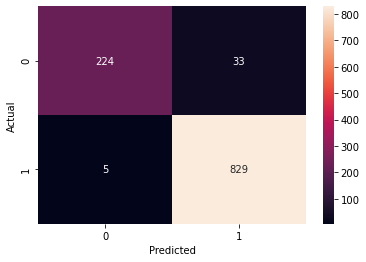


Confusion matrix for test data, when class 0 is compared to all:


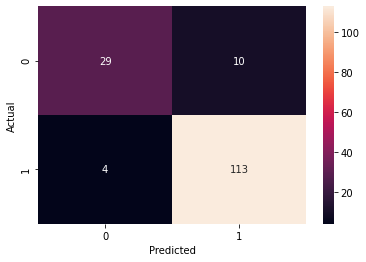

Accuracy on training data, when class 0 is compared vs all : 96.51695692025665%

Accuracy on validation data, when class 0 is compared vs all : 93.63057324840764%

Accuracy on test data, when class 0 is compared vs all : 91.02564102564102%



Confusion matrix for training data, when class 1 is compared to all:


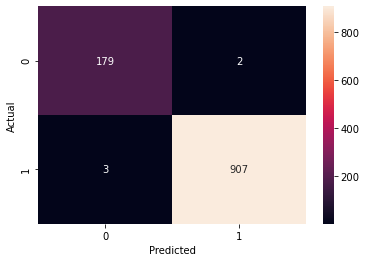


Confusion matrix for test data, when class 1 is compared to all:


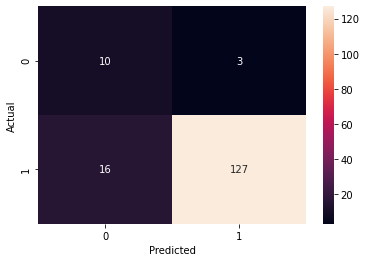

Accuracy on training data, when class 1 is compared vs all : 99.54170485792851%

Accuracy on validation data, when class 1 is compared vs all : 90.44585987261146%

Accuracy on test data, when class 1 is compared vs all : 87.82051282051282%



Confusion matrix for training data, when class 2 is compared to all:


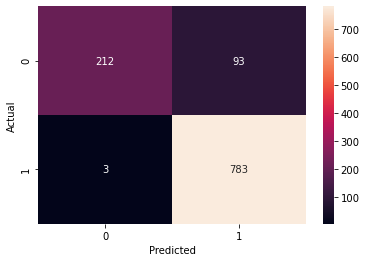


Confusion matrix for test data, when class 2 is compared to all:


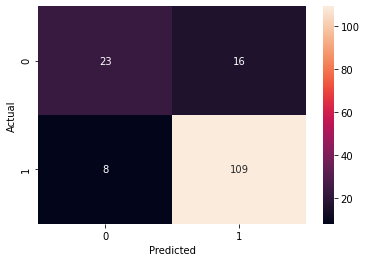

Accuracy on training data, when class 2 is compared vs all : 91.20073327222732%

Accuracy on validation data, when class 2 is compared vs all : 80.89171974522293%

Accuracy on test data, when class 2 is compared vs all : 84.61538461538461%



Confusion matrix for training data, when class 3 is compared to all:


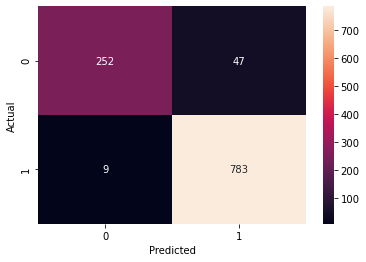


Confusion matrix for test data, when class 3 is compared to all:


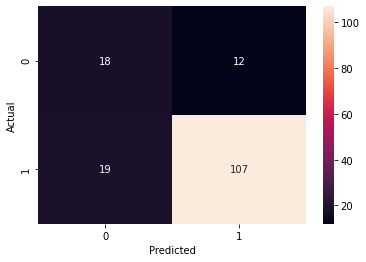

Accuracy on training data, when class 3 is compared vs all : 94.86709440879928%

Accuracy on validation data, when class 3 is compared vs all : 82.80254777070064%

Accuracy on test data, when class 3 is compared vs all : 80.12820512820514%



Confusion matrix for training data, when class 4 is compared to all:


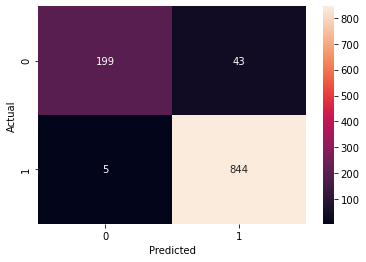


Confusion matrix for test data, when class 4 is compared to all:


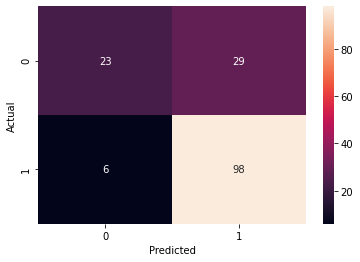

Accuracy on training data, when class 4 is compared vs all : 95.60036663611365%

Accuracy on validation data, when class 4 is compared vs all : 82.80254777070064%

Accuracy on test data, when class 4 is compared vs all : 77.56410256410257%




In [4]:
# array to store the classification accuracies for each of the datasets
accuracy_train = np.zeros(class_count)
accuracy_dev = np.zeros(class_count)
accuracy_test = np.zeros(class_count)

# to store the temporary labels of the features as we classify them 1 vs all
label = np.zeros(len(feature_train))

for i in range(class_count):
    # setting the class labels of training data for 1 vs all classification
    for j in range(len(feature_train)):
        if(class_train[j]==i):
            label[j] = 0
        else:
            label[j] = 1

    # model training
    clf = svm.SVC(kernel='rbf',class_weight='balanced',C=1.0,gamma=10)
    clf.fit(feature_train,label)
     
    confusion_matrix = predict_SVM(feature_train,label)
    print("\nConfusion matrix for training data, when class "+str(i)+" is compared to all:")
    printheatmap(confusion_matrix)
    accuracy_train[i] = np.trace(confusion_matrix)/len(feature_train)*100

    # setting the class labels of validation data for 1 vs all classification
    for j in range(len(feature_dev)):
        if(class_dev[j]==i):
            label[j] = 0
        else:
            label[j] = 1

    confusion_matrix = predict_SVM(feature_dev,label)
    accuracy_dev[i] = np.trace(confusion_matrix)/len(feature_dev)*100

    # setting the class labels of test data for 1 vs all classification
    for j in range(len(feature_test)):
        if(class_test[j]==i):
            label[j] = 0
        else:
            label[j] = 1
    confusion_matrix = predict_SVM(feature_test,label)
    print("\nConfusion matrix for test data, when class "+str(i)+" is compared to all:")
    printheatmap(confusion_matrix)
    accuracy_test[i] = np.trace(confusion_matrix)/len(feature_test)*100

    print("Accuracy on training data, when class "+str(i)+" is compared vs all : "+str(accuracy_train[i])+"%\n")
    print("Accuracy on validation data, when class "+str(i)+" is compared vs all : "+str(accuracy_dev[i])+"%\n")
    print("Accuracy on test data, when class "+str(i)+" is compared vs all : "+str(accuracy_test[i])+"%\n\n")

In [5]:
# this can be used to find the ideal parameters for the sklearn model
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.1, 1], 'gamma': [1,10,15,20]}

clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose=1)
clf_grid.fit(feature_train,label)
print(clf_grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 1, 'gamma': 10}
